**Intro to Jupyterlite**

In [1]:
print("Hello, World!")

Hello, World!


**Import Pandas**

This imports the pandas library 

In [2]:
import pandas as pd

<ipython-input-2-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Import the Operation System**

This imports the OS and allow you to use across different systems

In [3]:
import os

This shows where the files etc are being saved

In [4]:
pwd

'/drive'

**Import a CSV File**

To allow this the csv file must be within the same folder (similar to the way HTML files work on a webserver).

This code is creating a variable which will hold the data from the CSV file, pf is the variable name and pd.read is using the "read" method from the Pandas Library
pf = pd.read_csv ('Car_Insurance_Claim.csv').

In [5]:
df = pd.read_csv ('Car_Insurance_Claim.csv')

This code runs the top 5 (5) rows of the CSV file 

head is the method in the Pandas Library to view the top 5 rows of your CSV

In [6]:
df.head(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


**Pandas Method**

isna() https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

Detect missing values.
Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).

In [7]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

------
**Exercises**

**Car Insurance Analysis task - Column statistics**

Generate descriptive statistical data including:
- Mean
- Median
- Mode
- Standard Deviation
- Variance
- Range (This is a little trickier than the others)

*Points to remember*
- df is the variable name and there is no . after the varibale name
- The ANNUAL_MILEAGE is the column name in the CSV file, it is case sensative
- -----

In [8]:
## This the mean average of the Annual Mileage
df['ANNUAL_MILEAGE'] .mean()

11697.003206900365

In [9]:
## This is the median or mid point of the ID column
df['ID'] .median()

501777.0

In [10]:
## This is the Mode or most common value 
df['EDUCATION'].mode()

0    high school
Name: EDUCATION, dtype: object

In [11]:
## This is the Standard Deviation (.std)is a measure of how dispersed the data is in relation to the mean
## Low, or small, standard deviation indicates data are clustered tightly around the mean, and high, 
## or large, standard deviation indicates data are more spread out.
df['PAST_ACCIDENTS'].std()

1.6524537422684586

In [12]:
## This is the Variance (.var)
df['CREDIT_SCORE'].var()

0.018958009943334072

-----
**Grouping & Group By**

Great resource to understand Grouping
https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

Use python to filter the data so that you can draw comparisons between categories (such as region or claim type). Compare the following statistics for data relating to those categories and comment on any findings:

- Mean
- Median
- Mode
- Standard Deviation
- Variance

Group pandas.DataFrame.groupby documentation
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

-----

In [13]:
## IMPOARTANT - when using Grouping, the variable must be unique, if you use the same VAR Name then the code will 
## populate all the Variables and overight the data

## This Group By is using the ('GENDER') column and counting the ['SPEEDING_VIOLATIONS'] column and printing the Mean Average

## This is the Average Speed Violation grouped by Gender
grouped1=df.groupby('GENDER')['SPEEDING_VIOLATIONS'].mean()
print(grouped1)

print() ## add white space

## This is the Mid Point value of the Credit Score Value, grouped by the Income banding
grouped2=df.groupby('INCOME')['CREDIT_SCORE'].median()
print(grouped2)

print() ## add white space

## This is the most common value 
## grouped3=df.groupby('GENDER')['VEHICLE_TYPE'].mode()
## print(grouped3)

print() ## add white space

## This is the Standard Deviation of teh Credit Score, grouped by the Income Banding
grouped4=df.groupby('INCOME')['CREDIT_SCORE'].std()
print(grouped4)

print() ## add white space

grouped5=df.groupby('EDUCATION')['CREDIT_SCORE'].var()
print(grouped5)

GENDER
female    1.030739
male      1.936874
Name: SPEEDING_VIOLATIONS, dtype: float64

INCOME
middle class     0.526747
poverty          0.349915
upper class      0.616289
working class    0.431376
Name: CREDIT_SCORE, dtype: float64


INCOME
middle class     0.092502
poverty          0.091523
upper class      0.091641
working class    0.093582
Name: CREDIT_SCORE, dtype: float64

EDUCATION
high school    0.018310
none           0.015179
university     0.013180
Name: CREDIT_SCORE, dtype: float64


-----

**Car Insurance Analysis task - Some Data Visualisations**

Now import Matplotlab as plt - commonly used in Jupyter notebooks for plotting with Matplotlib.

```
import matplotlib.pyplot as plt
```
This line imports the pyplot module from Matplotlib and gives it the alias plt. This module provides a MATLAB-like interface for creating static, animated, and interactive visualizations in Python.

```
%matplotlib inline
```
This is a magic command specific to Jupyter notebooks. It allows you to display Matplotlib plots directly in the notebook, rather than in a separate window. This is useful for data exploration and analysis, as you can see the results of your plots immediately after executing the code.

---


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

----

You can use some of the previous columns for the df variable that was created above, you will need to create new variables and these will need to be unique to hold the values from the dataframe. 

*Example for George I happened to have created two new one’s as I know I need two axis for this chart*

```
SpCol = df['SPEEDING_VIOLATIONS']
AccCol = df['PAST_ACCIDENTS']
```
Below is accessing MatplotLib, feeding it the data I filtered in the command above. Created names for the axis and title; and then finally displayed it.
```
plt.bar(AccCol, SpCol)
plt.xlabel("Past Accidents")
plt.ylabel("Sppeding Violations")
plt.title("Speeding VS Accidents")
plt.show() 
```

-----

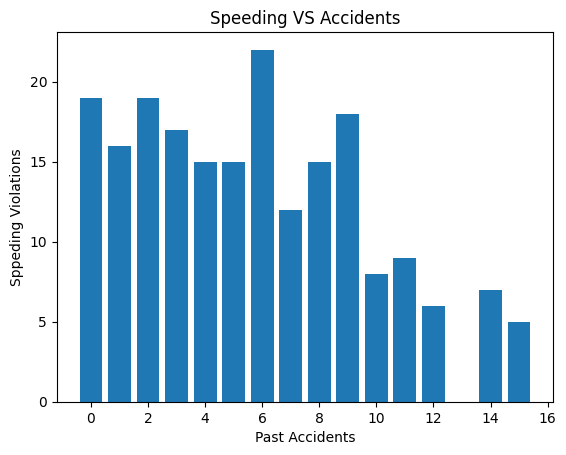

In [15]:
SpCol = df['SPEEDING_VIOLATIONS']
AccCol = df['PAST_ACCIDENTS']

plt.bar(AccCol, SpCol)
plt.xlabel("Past Accidents")
plt.ylabel("Sppeding Violations")
plt.title("Speeding VS Accidents")
plt.show() 

-----

If you do exactly above, change ‘SPEEDING_VIOLATIONS’ and ‘PAST_ACCIDENTS’ to different data and change this:
```
plt.bar(AccCol, SpCol)
``` 
To
```
plt.hist(YourName1, YourName2)
```
you are only a change of titles and labels from having a second chart.


Using this resource https://www.w3schools.com/python/matplotlib_intro.asp 

Add different graphs of your own choosing. You are free to make another bar chart, just with different data. If you have previously grouped categories together, you can make charts of that.

-----

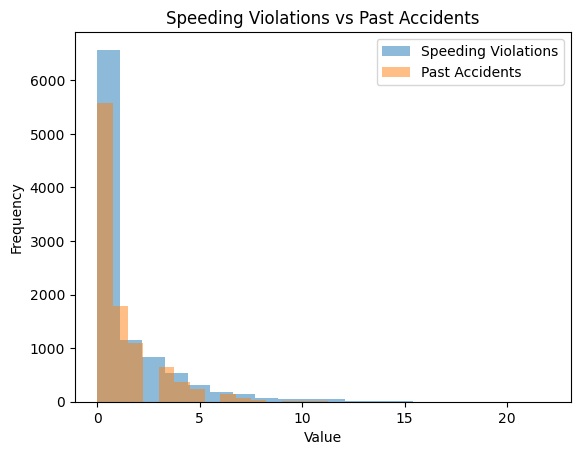

In [16]:
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

SpCol2 = df['SPEEDING_VIOLATIONS']
AccCol2 = df['PAST_ACCIDENTS']

plt.hist(SpCol2, bins=20, alpha=0.5, label='Speeding Violations')
plt.hist(AccCol2, bins=20, alpha=0.5, label='Past Accidents')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Speeding Violations vs Past Accidents")
plt.legend()
plt.show()

## In this version, I've added the alpha parameter to make the histograms semi-transparent, 
## allowing you to see both distributions overlaid on top of each other. Adjust the bins parameter as needed for better visualisation.


----

To compare the counts of females and males in each age group, you’ll need to aggregate your data first. A bar chart typically requires categories on one axis and their counts on the other. Here's how you can achieve that:
- Group the data by age and gender.
- Count the occurrences of each gender within each age group.
- Create a bar plot with age groups on the x-axis and counts of genders on the y-axis.

**Explanation:**
- Grouping: The groupby function groups the data by both age and gender, and size() counts the occurrences. The unstack() method reshapes the data for easy plotting.
- Plotting: plot(kind='bar') creates a bar chart. You can set stacked=True if you prefer a stacked bar chart.
- Labels and Title: Set the x and y labels and the chart title for clarity.
  
Make sure to replace the sample DataFrame with your actual data. Adjust the plot settings as needed!

----

GENDER  female  male
AGE                 
16-25     1034   982
26-39     1515  1548
40-64     1466  1465
65+        995   995


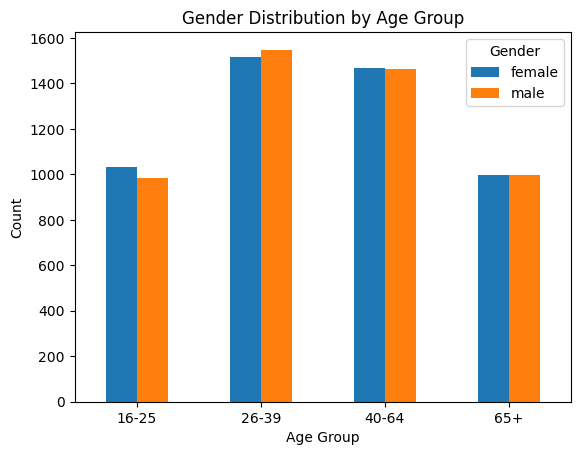

In [20]:
import pandas as pd

# Group by age and gender and count occurrences
age_gender_counts = df.groupby(['AGE', 'GENDER']).size().unstack(fill_value=0)
print (age_gender_counts)

# Create a bar plot
age_gender_counts.plot(kind='bar', stacked=False)  # Use stacked=True for a stacked bar chart
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Gender Distribution by Age Group')
plt.xticks(rotation=0)  # Optional: rotate x-axis labels for better visibility
plt.legend(title='Gender')
plt.show()


**Breakdown:**
```
df.groupby(['AGE', 'GENDER']):
```
- This part groups the DataFrame df by the two columns AGE and GENDER.
- Each unique combination of age and gender creates a group.
```
.size():
```
- After grouping, .size() calculates the number of occurrences (or count) for each group created by the previous step.
- This results in a Series where the index is a MultiIndex (age, gender) and the values are the counts of each combination.
```
.unstack(fill_value=0):
```
- The unstack() function pivots the last level of the index (in this case, GENDER) to create a new DataFrame where:
    - Each unique age becomes a row.
    - Each unique gender becomes a column.
```
fill_value=0
```
- parameter replaces any missing values with 0. This is useful when there are age groups that have no entries for a particular gender, ensuring that the resulting DataFrame doesn't contain NaN values.

**Result:**
The final age_gender_counts DataFrame will have:
- Rows corresponding to each unique age group.
- Columns corresponding to each gender (e.g., 'M' for male, 'F' for female).
- The values in the DataFrame represent the counts of each gender for each age group.

**Example:**
If your original DataFrame looks like this:

|AGE|GENDER|
|-----|-----|
|25|F
|25|M
|30|F
|30|F
|35|M

The result after this line of code would look something like:

|AGE|F|M|
|-----|-----|-----|
|25|1|1
|30|2|0
|35|0|1

This structure is ideal for creating visualizations, such as bar charts, to compare the distribution of genders across different age groups.